# Trabalho 7


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

In [ ]:
sns.set_style("whitegrid")

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=cols)

# Limpeza
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df = df.astype(float)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
df

# Exibindo as primeiras linhas e informações do dataframe
print("--- Primeiras 5 linhas do DataFrame ---")
print(df.head())
print("\n--- Informações do DataFrame ---")
df.info()
print("\n--- Estatísticas Descritivas ---")
print(df.describe())

--- Primeiras 5 linhas do DataFrame ---
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       1  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

--- Informações do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null

In [ ]:
# Separando as variáveis explicativas (X) da variável alvo (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividindo os dados em conjuntos de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Padronização das features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Formato dos dados de treino: {X_train_scaled.shape}")
print(f"Formato dos dados de teste: {X_test_scaled.shape}")

Formato dos dados de treino: (237, 13)
Formato dos dados de teste: (60, 13)


In [ ]:
#Regressão Logística
# Definindo o modelo e o grid de parâmetros
log_reg = LogisticRegression(solver='liblinear', random_state=42)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Configurando e executando o GridSearchCV
grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train)

best_lr = grid_lr.best_estimator_
print(f"Melhores Parâmetros (Regressão Logística): {grid_lr.best_params_}")

Melhores Parâmetros (Regressão Logística): {'C': 0.01, 'penalty': 'l2'}


In [ ]:
# k-Nearest Neighbors (k-NN)
# Definindo o modelo e o grid de parâmetros
knn = KNeighborsClassifier(n_jobs=-1)
param_grid_knn = {
    'n_neighbors': np.arange(3, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Configurando e executando o GridSearchCV
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train)

best_knn = grid_knn.best_estimator_
print(f"Melhores Parâmetros (k-NN): {grid_knn.best_params_}")

Melhores Parâmetros (k-NN): {'metric': 'manhattan', 'n_neighbors': np.int64(19), 'weights': 'distance'}


In [ ]:
# Support Vector Machine (SVM)
# Definindo o modelo e o grid de parâmetros
svm = SVC(probability=True, random_state=42) # probability=True para calcular AUC
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Configurando e executando o GridSearchCV
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='roc_auc', n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)

best_svm = grid_svm.best_estimator_
print(f"Melhores Parâmetros (SVM): {grid_svm.best_params_}")

Melhores Parâmetros (SVM): {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}


In [ ]:
# Árvore de Decisão
# Definindo o modelo e o grid de parâmetros
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurando e executando o GridSearchCV
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)
grid_dt.fit(X_train_scaled, y_train)

best_dt = grid_dt.best_estimator_
print(f"Melhores Parâmetros (Árvore de Decisão): {grid_dt.best_params_}")

Melhores Parâmetros (Árvore de Decisão): {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


--- Avaliação: Regressão Logística ---
Matriz de Confusão:
[[29  3]
 [ 5 23]]
Acurácia: 0.8667
Sensibilidade (Recall): 0.8214
Especificidade: 0.9062
AUC: 0.9509

--- Avaliação: k-NN ---
Matriz de Confusão:
[[29  3]
 [ 6 22]]
Acurácia: 0.8500
Sensibilidade (Recall): 0.7857
Especificidade: 0.9062
AUC: 0.9554

--- Avaliação: SVM ---
Matriz de Confusão:
[[31  1]
 [15 13]]
Acurácia: 0.7333
Sensibilidade (Recall): 0.4643
Especificidade: 0.9688
AUC: 0.9431

--- Avaliação: Árvore de Decisão ---
Matriz de Confusão:
[[26  6]
 [ 8 20]]
Acurácia: 0.7667
Sensibilidade (Recall): 0.7143
Especificidade: 0.8125
AUC: 0.7919



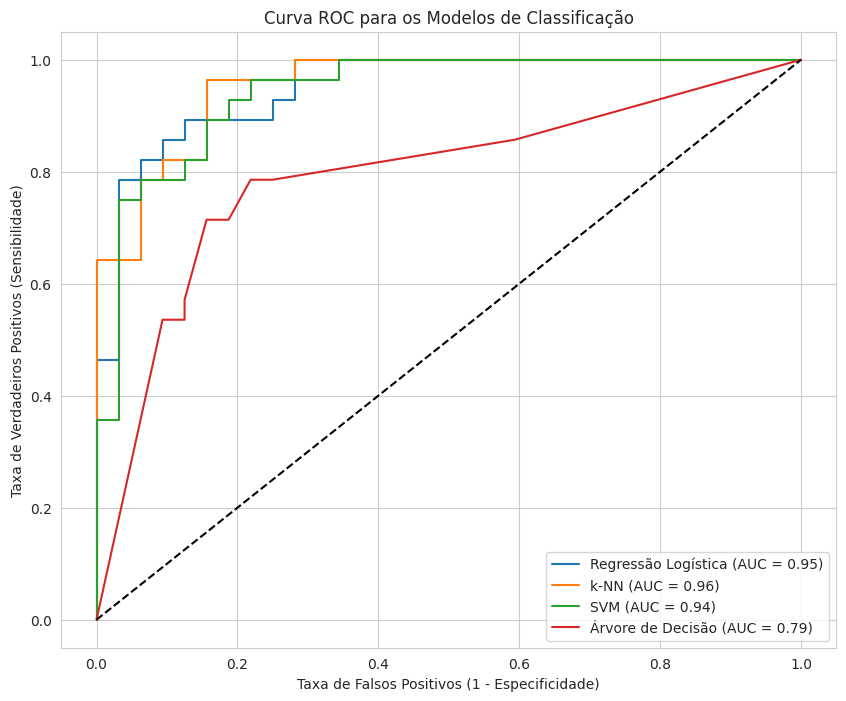

                Modelo  Acurácia  Sensibilidade  Especificidade       AUC
0  Regressão Logística  0.866667       0.821429         0.90625  0.950893
1                 k-NN  0.850000       0.785714         0.90625  0.955357
2                  SVM  0.733333       0.464286         0.96875  0.943080
3    Árvore de Decisão  0.766667       0.714286         0.81250  0.791853


In [ ]:
# Avaliação dos Modelos
models = {
    "Regressão Logística": best_lr,
    "k-NN": best_knn,
    "SVM": best_svm,
    "Árvore de Decisão": best_dt
}

# DataFrame para armazenar os resultados
results = []

# Função para calcular métricas da matriz de confusão
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return accuracy, sensitivity, specificity, cm

# Plot da Curva ROC
plt.figure(figsize=(10, 8))

# Avaliação de cada modelo
for name, model in models.items():
    # Previsões
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Cálculo das métricas
    accuracy, sensitivity, specificity, cm = calculate_metrics(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results.append([name, accuracy, sensitivity, specificity, auc])
    print(f"--- Avaliação: {name} ---")
    print(f"Matriz de Confusão:\n{cm}")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Sensibilidade (Recall): {sensitivity:.4f}")
    print(f"Especificidade: {specificity:.4f}")
    print(f"AUC: {auc:.4f}\n")

    # Dados para a Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Configurações do gráfico da Curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva ROC para os Modelos de Classificação')
plt.legend()
plt.show()

results_df = pd.DataFrame(results, columns=['Modelo', 'Acurácia', 'Sensibilidade', 'Especificidade', 'AUC'])
print(results_df)

#Análise por Métrica
### AUC (Área Sob a Curva ROC):
É uma métrica que indica a capacidade geral de um modelo em distinguir entre as classes positiva e negativa.
- k-NN e Regressão Logística apresentaram os melhores resultados, com AUCs de 0.955 e 0.951, respectivamente. Ambos são excelentes em separar os pacientes doentes dos saudáveis.
- O SVM também mostrou um bom poder de distinção, com um AUC de 0.943.
- A Árvore de Decisão ficou significativamente atrás, com um AUC de 0.792, indicando uma capacidade de distinção apenas razoável.

### Acurácia:
Mede a proporção de previsões corretas no geral.

- A Regressão Logística foi o modelo com a maior acurácia (0.867), seguida de perto pelo k-NN (0.850). Isso significa que eles acertaram a classificação da maioria dos pacientes.

- Sensibilidade (Recall): Esta é uma métrica crucial em diagnósticos médicos. Ela mede a proporção de pacientes que realmente têm a doença e que foram corretamente identificados pelo modelo.

- A Regressão Logística foi a melhor neste quesito, identificando corretamente 82.1% dos pacientes doentes.

- O k-NN teve um bom desempenho (78.6%), mas a performance do SVM foi muito preocupante, com apenas 46.4%. Isso significa que o SVM falhou em diagnosticar mais da metade dos pacientes que tinham a doença, o que representa um risco clínico inaceitável.

### Especificidade:
Mede a proporção de pacientes que não têm a doença e que foram corretamente identificados como saudáveis.

- O SVM se destacou com uma especificidade quase perfeita (96.9%). Isso mostra que o modelo é extremamente bom em identificar pacientes saudáveis, mas, como visto na sensibilidade, isso ocorreu ao custo de classificar erroneamente muitos pacientes doentes como saudáveis.

- Regressão Logística e k-NN também tiveram uma excelente especificidade (90.6%), mostrando um ótimo equilíbrio.

### Comparação dos Modelos e Escolha Final
Árvore de Decisão: Foi o modelo com o desempenho mais fraco em quase todas as métricas, especialmente no AUC, e pode ser descartado como a melhor opção.

SVM: Apesar de seu alto AUC e alta especificidade, sua sensibilidade extremamente baixa o torna inadequado e problemático para um cenário de diagnóstico médico, onde a prioridade é não deixar de identificar um paciente doente (evitar falsos negativos).

k-NN vs. Regressão Logística: Estes foram os dois modelos mais fortes. O k-NN teve o maior AUC por uma margem mínima. No entanto, a Regressão Logística obteve a maior acurácia geral e, mais importante, a maior sensibilidade, ao mesmo tempo em que manteve uma especificidade muito alta.

### Justificativa e Escolha do Melhor Modelo:

Para uma tarefa de diagnóstico de doenças, o custo de um falso negativo (não detectar a doença em um paciente que a possui) é muito maior do que o de um falso positivo (diagnosticar a doença em um paciente saudável, que levaria a exames adicionais). Portanto, a Sensibilidade é a métrica de maior peso, seguida por um alto AUC para garantir o poder de discriminação geral.

O modelo de Regressão Logística oferece o melhor equilíbrio entre todas as métricas críticas. Ele não apenas possui um poder de discriminação quase perfeito (AUC de 0.951), mas também foi o mais eficaz em identificar corretamente os pacientes doentes (Sensibilidade de 82.1%), sem sacrificar significativamente sua capacidade de identificar os saudáveis (Especificidade de 90.6%).

Portanto, o modelo de Regressão Logística é a melhor escolha para esta tarefa, pois apresenta o desempenho mais robusto, confiável e seguro para o contexto clínico.